In [26]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline

# data eksploration

In [27]:
df = pd.read_csv('./datasetV1.csv')
df.sample(5)

,datetime,temp,feelslike,conditions,libur,daya_listrik
23,2023-01-24,24.9,25.2,"Rain, Overcast",0,0.99874
131,2023-05-12,28.7,31.8,"Rain, Partially cloudy",0,2.05731
71,2023-03-13,25.0,26.5,"Rain, Partially cloudy",0,1.76109
2,2023-01-03,26.1,27.0,"Rain, Partially cloudy",0,1.12345
15,2023-01-16,26.1,27.2,"Rain, Partially cloudy",0,1.23158


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      152 non-null    object 
 1   temp          152 non-null    float64
 2   feelslike     152 non-null    float64
 3   conditions    152 non-null    object 
 4   libur         152 non-null    int64  
 5   daya_listrik  152 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 7.2+ KB


# data cleaning

In [29]:
# Hapus kolom Tanggal
df.drop('datetime',axis='columns',inplace=True)
df.dtypes

temp            float64
feelslike       float64
conditions       object
libur             int64
daya_listrik    float64
dtype: object

In [30]:
def print_all_unique_col_values(df):
  for column in df:
      print(f"{column} : {df[column].unique()}")

def print_object_unique_col_values(df):
  for column in df:
    if df[column].dtypes == 'object':
      print(f"{column} : {df[column].unique()}")

print_all_unique_col_values(df)
print_object_unique_col_values(df)

temp : [25.9 26.1 26.5 25.5 25.8 24.9 26.2 26.  25.6 22.9 25.3 24.8 25.2 25.4
 26.4 26.6 26.8 26.3 27.3 26.9 27.1 25.  26.7 27.2 27.  27.4 27.5 27.8
 28.  28.4 28.2 28.3 28.1 27.9 27.6 28.7 27.7 28.8 28.5 28.9 29.3 29.
 28.6]
feelslike : [26.9 27.  27.3 27.5 26.1 26.7 26.6 26.2 25.3 27.2 27.6 25.5 22.9 26.4
 25.2 25.8 27.8 27.4 28.2 27.9 28.1 28.3 27.7 28.7 28.  29.  28.5 28.6
 26.5 28.8 29.3 29.2 29.4 28.9 29.1 29.7 29.5 29.9 30.1 30.7 30.6 32.1
 31.7 31.9 28.4 31.1 31.2 30.9 31.4 30.5 30.2 31.3 31.  30.3 31.8 32.6
 32.  32.7 30.8 30. ]
conditions : ['Rain, Partially cloudy' 'Partially cloudy' 'Rain, Overcast' 'Clear'
 'Overcast']
libur : [1 0]
daya_listrik : [1.76459 1.20568 1.12345 1.03574 0.89243 1.20146 0.95032 1.83052 1.05739
 0.96812 0.82481 1.45233 1.30007 1.22993 1.90281 1.23158 0.89943 0.77626
 1.26902 1.33169 1.08107 1.60835 1.49027 0.99874 1.13599 1.02345 1.02831
 1.30172 1.76494 1.12768 1.63942 1.94327 1.89354 1.81592 1.76973 2.09412
 1.80123 1.86179 1.92481 1.85247 1.7246

In [31]:
df1 = pd.get_dummies(data=df, columns=['conditions'])
df1.columns

Index(['temp', 'feelslike', 'libur', 'daya_listrik', 'conditions_Clear',
       'conditions_Overcast', 'conditions_Partially cloudy',
       'conditions_Rain, Overcast', 'conditions_Rain, Partially cloudy'],
      dtype='object')

In [32]:
df1.sample(5)

,temp,feelslike,libur,daya_listrik,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
141,28.1,31.2,0,2.01753,0,0,0,0,1
127,26.8,27.8,0,1.90876,0,0,0,0,1
118,27.8,30.6,0,2.02345,0,0,0,0,1
1,25.9,27.0,0,1.20568,0,0,0,0,1
130,28.5,31.9,0,2.11357,0,0,0,0,1


# modelling

In [33]:
X = df1.drop('daya_listrik', axis='columns')
X

,temp,feelslike,libur,conditions_Clear,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,25.9,26.9,1,0,0,0,0,1
1,25.9,27.0,0,0,0,0,0,1
2,26.1,27.0,0,0,0,0,0,1
3,25.9,27.3,0,0,0,0,0,1
4,26.1,27.5,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
147,28.3,31.3,1,0,0,0,0,1
148,28.1,30.8,0,0,0,0,1,0
149,28.0,30.6,0,0,1,0,0,0
150,27.7,30.1,0,0,0,0,1,0


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               152 non-null    float64
 1   feelslike                          152 non-null    float64
 2   libur                              152 non-null    int64  
 3   conditions_Clear                   152 non-null    uint8  
 4   conditions_Overcast                152 non-null    uint8  
 5   conditions_Partially cloudy        152 non-null    uint8  
 6   conditions_Rain, Overcast          152 non-null    uint8  
 7   conditions_Rain, Partially cloudy  152 non-null    uint8  
dtypes: float64(2), int64(1), uint8(5)
memory usage: 4.4 KB


In [35]:
y = df1['daya_listrik']
y

0      1.76459
1      1.20568
2      1.12345
3      1.03574
4      0.89243
        ...   
147    2.03127
148    1.99143
149    1.98678
150    1.97589
151    2.02356
Name: daya_listrik, Length: 152, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split      #20% dari data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape, X_test.shape

((121, 8), (31, 8))

In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization

# Inisialisasi model
model = Sequential()

# Tambahkan lapisan konvolusi 1D
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Tambahkan lapisan pooling
model.add(MaxPooling1D(2))

# Tambahkan lapisan flatten
model.add(Flatten())

# Tambahkan lapisan tersembunyi (hidden layer) dengan fungsi aktivasi ReLU
model.add(Dense(64, activation='relu'))

# Tambahkan lapisan output tanpa fungsi aktivasi khusus untuk regresi
model.add(Dense(1))

# Kompilasi model dengan MSE sebagai loss function dan Adam sebagai optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model dengan data Anda
history = model.fit(X_train, y_train, epochs=50) # Ubah jumlah epochs dan batch size sesuai kebutuhan Anda


Epoch 1/50


4/4 [==============================] - 2s 5ms/step - loss: 0.1546
Epoch 2/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1121
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0924
Epoch 4/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0823
Epoch 5/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0685
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0673
Epoch 7/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0690
Epoch 8/50
4/4 [==============================] - 0s 6ms/step - loss: 0.0612
Epoch 9/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0616
Epoch 10/50
4/4 [==============================] - 0s 9ms/step - loss: 0.0601
Epoch 11/50
4/4 [==============================] - 0s 8ms/step - loss: 0.0588
Epoch 12/50
4/4 [==============================] - 0s 10ms/step - loss: 0.0580
Epoch 13/50
4/4 [==============================] - 0s 11ms/step - loss: 0.0594


###evaluate MAE

In [38]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 382ms/step - loss: 0.0796


0.07960797846317291

In [39]:
yp = model.predict(X_test)
yp[:10]

1/1 [==============================] - 0s 205ms/step


array([[1.7062787],
       [1.9676756],
       [1.9690319],
       [1.820841 ],
       [1.9585044],
       [1.6931826],
       [1.6279703],
       [1.8490021],
       [1.5365657],
       [1.8867986]], dtype=float32)

### Evaluate  coefficient of determination (R-squared)

In [40]:
y_pred = model.predict(X_train)
y_true = y_train
print(len(y_true))
print(len(y_pred))

4/4 [==============================] - 0s 3ms/step
121
121


In [41]:
from sklearn.metrics import r2_score
# Menghitung R-squared
r2 = r2_score(y_true, y_pred)

print("R-squared:", r2)

R-squared: 0.46233775515974074


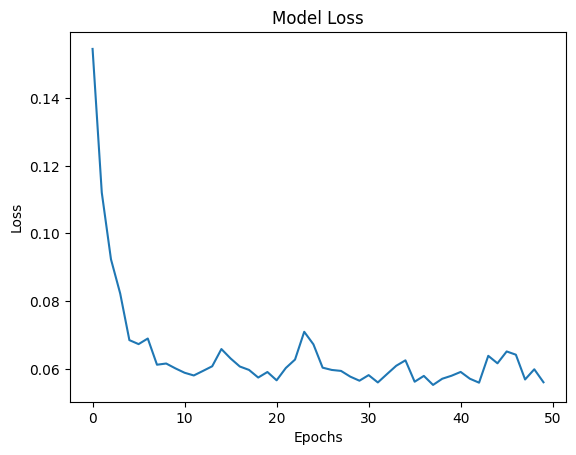

In [42]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             256       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                12352     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
__________________________________________________

In [44]:
model.save('modelv1.h5')